1. Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

In [271]:
import numpy as np

class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
        
    
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
    
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]

    
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            
            loss = self.loss(sigma,self.y)

            dW = self.gradient_descent(self.x , sigma, self.y)
            
            
            self.weight -= lr * dW

        return print('fitted successfully to data')
    
    
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        w = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                w[i] = 1
            else:
                continue
                
        return w
            


2. Взять данные для предсказания заболеваний сердца (целевой признак для предсказания --- target).

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data = pd.read_csv('heart.csv')

3. Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [273]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [274]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


В данных нет пропусков, чистка не нужна

4. Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

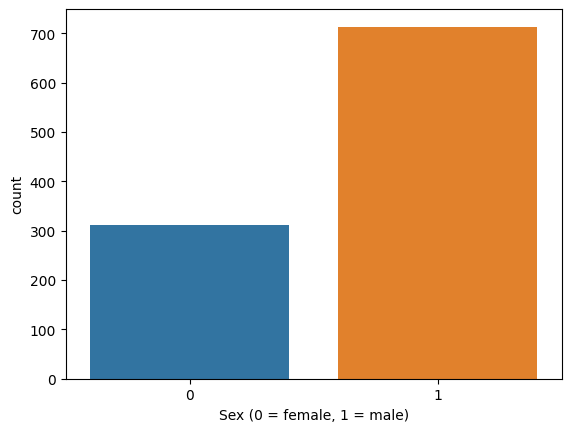

In [276]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

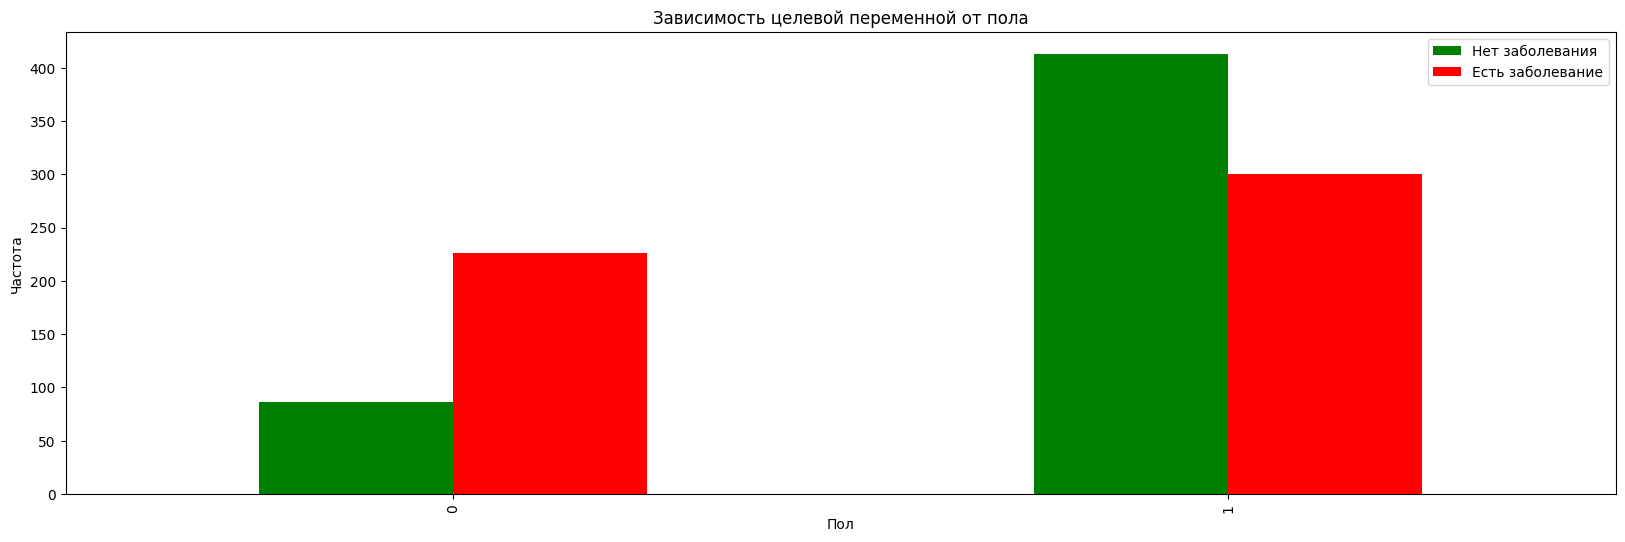

In [277]:
pd.crosstab(data.sex, data.target).plot(kind="bar", figsize=(20, 6), color=['green','red'])
plt.title('Зависимость целевой переменной от пола')
plt.xlabel('Пол')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

У женщин заболенвания сердца встречается реже, чем у мужчин.

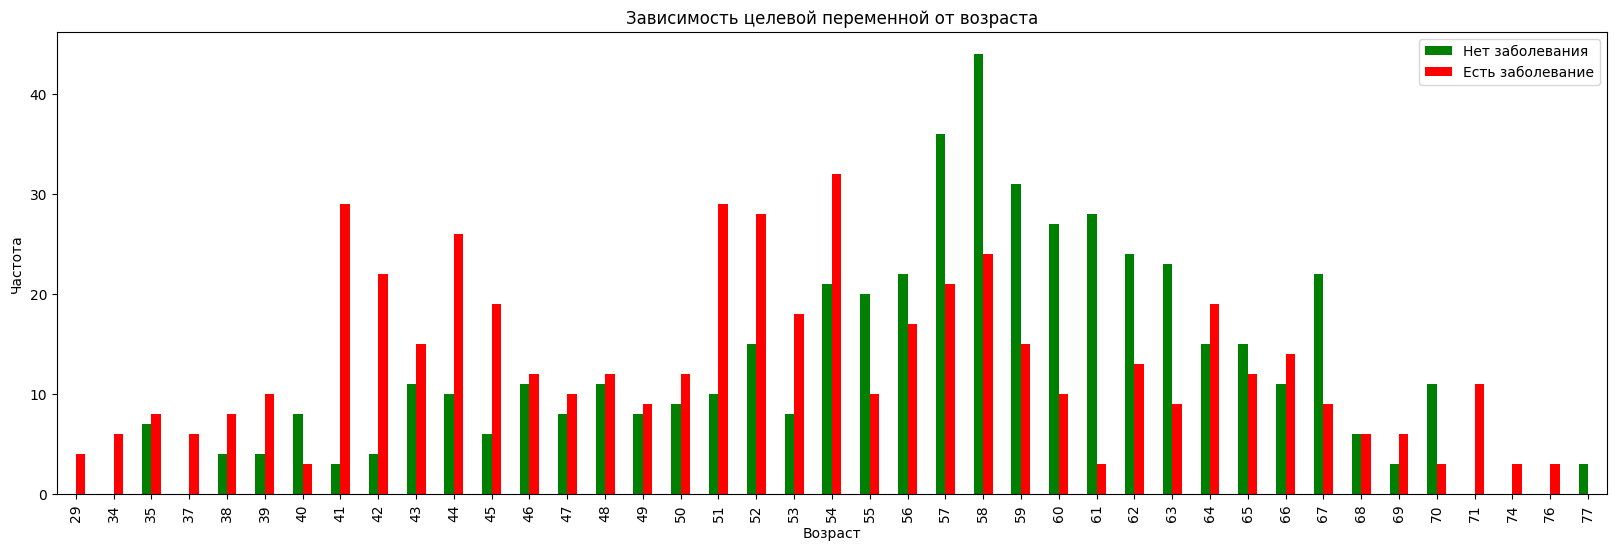

In [278]:
pd.crosstab(data.age, data.target).plot(kind="bar", figsize=(20, 6), color=['green','red'])
plt.title('Зависимость целевой переменной от возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

В возрасте от 40 до 60 лет заболения сердца встречаются чаще

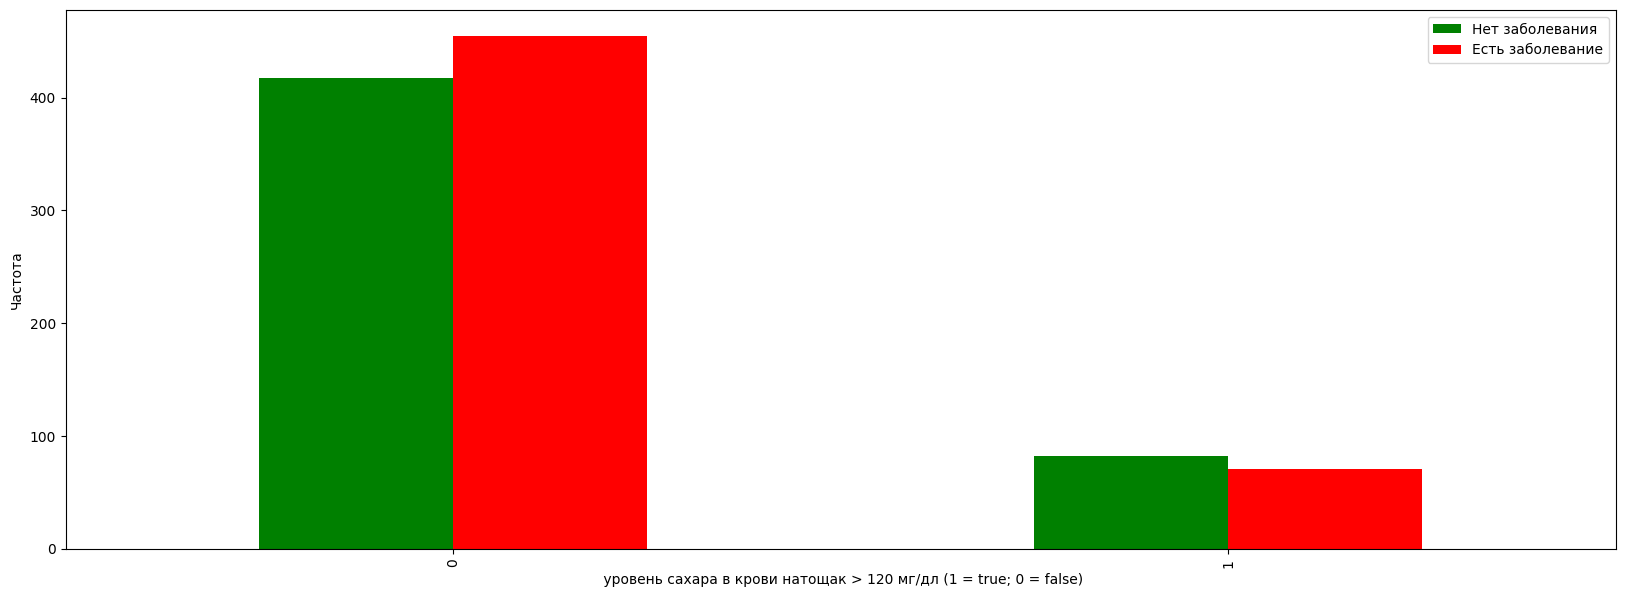

In [279]:
pd.crosstab(data.fbs, data.target).plot(kind="bar", figsize=(20, 7), color=['green','red'])
plt.xlabel(' уровень сахара в крови натощак > 120 мг/дл (1 = true; 0 = false)')
plt.ylabel('Частота')
plt.legend(["Нет заболевания", "Есть заболевание"])
plt.show()

5. При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering)

In [280]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X_train = data.drop(['target'], axis=1)
y_train = data['target']

logRed = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(logRed, n_features_to_select=6)
rfe = rfe.fit(X_train,y_train)

print('Selected features: %s' % list(X_train.columns[rfe.support_]))

X_train = X_train.drop(['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak'], axis=1)

Selected features: ['sex', 'cp', 'exang', 'slope', 'ca', 'thal']


6. Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

In [281]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# Датасет с выбранными признаками
X = data[['sex', 'cp', 'exang', 'slope', 'ca', 'thal']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # предсказываем вероятность по классам
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))



Train/Test split results:
LogisticRegression accuracy is 0.795
LogisticRegression log_loss is 0.442
LogisticRegression auc is 0.880


7. Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).


Logistic regression

In [282]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.7951219512195122


Подбор гиперпараметров

In [283]:
from sklearn.model_selection import GridSearchCV
params = {'C': np.arange(0.001, 0.01, 0.01)}
model = LogisticRegression()
grid = GridSearchCV(model, params)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_lr = grid.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred_lr)}')

{'C': 0.001}
accuracy: 0.7804878048780488


 Кросс-валидация

In [284]:
model = LogisticRegression(C=0.1)
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'accuracy: {np.mean(scores)}')

accuracy: 0.8231707317073171


SVM

In [285]:
from sklearn.svm import SVC
SVM_model = SVC()
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8731707317073171


Подбор гиперпараметров

In [286]:
params = {'C':  np.arange(0.001, 10, 0.01)}
SVM_model = SVC()
grid = GridSearchCV(SVM_model, params)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_svm = grid.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred_svm)}')

{'C': 9.040999999999999}
accuracy: 0.8585365853658536


 Кросс-валидация

In [287]:
SVM_model = SVC(C=0.1, kernel='rbf')
result = cross_val_score(SVM_model, X_train, y_train, cv=5)
print(f'accuracy: {np.mean(result)}')

accuracy: 0.8378048780487806


knn

In [288]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.824390243902439


Подбор гиперпараметров

In [289]:
params = {'n_neighbors': [ 8, 9, 10, 5, 7 ,10], 'weights': ['uniform', 'distance']}
knn_model = KNeighborsClassifier()
grid = GridSearchCV(knn_model, params)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_knn = grid.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred_knn)}')

{'n_neighbors': 9, 'weights': 'distance'}
accuracy: 0.8439024390243902


Кросс-валидация

In [290]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
result = cross_val_score(knn_model, X_train, y_train, cv=5)
print(f'accuracy: {np.mean(result)}')

accuracy: 0.8792682926829268


 Naive Bayes

In [291]:
from sklearn.naive_bayes import GaussianNB

model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)
print("accuracy:", model_bayes.score(X_test, y_test))

accuracy: 0.824390243902439


Подбор гиперпараметров 

In [292]:
params = {'var_smoothing': [1000000, 1, 10, 100, 1000]}
model_bayes = GaussianNB()
grid = GridSearchCV(model_bayes, params)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_bayes = grid.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred_bayes)}')

{'var_smoothing': 1}
accuracy: 0.8


Кросс-валидация

In [293]:
model_bayes = GaussianNB(var_smoothing=1e-09)
result = cross_val_score(model_bayes, X_train, y_train, cv=5)
print(f'accuracy: {np.mean(result)}')

accuracy: 0.8341463414634147


Decision Tree

In [294]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
print("accuracy:", decision_tree.score(X_train, y_train))

accuracy: 0.9134146341463415


Подбор гиперпараметров

In [295]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
model = DecisionTreeClassifier()
grid = GridSearchCV(model, params)
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_tree = grid.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred_tree)}')

{'criterion': 'gini', 'max_depth': 7}
accuracy: 0.8682926829268293


In [296]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
result = cross_val_score(decision_tree, X_train, y_train, cv=5)
print(f'accuracy: {np.mean(result)}')

accuracy: 0.8658536585365854


8. Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

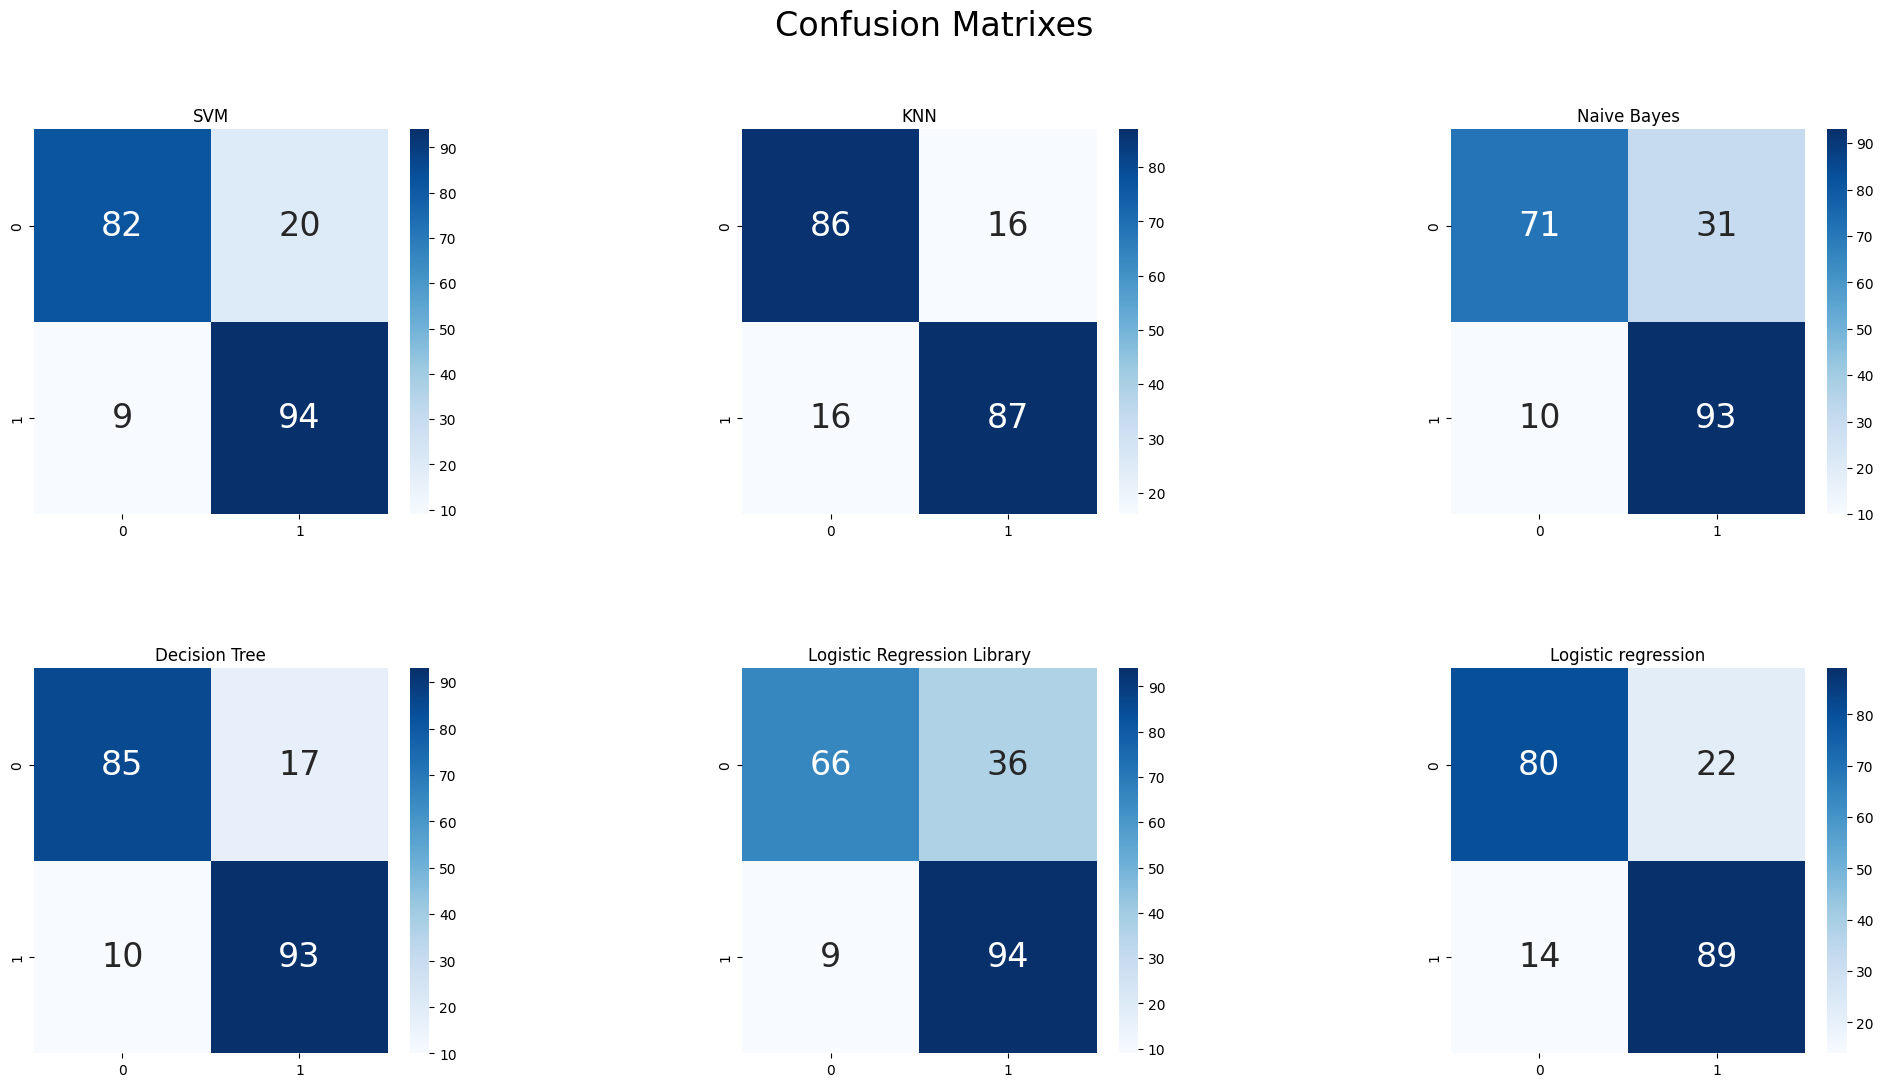

In [297]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.6, hspace= 0.4)

plt.subplot(2, 3, 1)
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), cmap="Blues", annot=True, fmt="d", annot_kws={"size": 24})

plt.subplot(2, 3, 2)
plt.title("KNN")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.subplot(2, 3, 3)
plt.title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_bayes), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.subplot(2, 3, 4)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test,  y_pred_tree), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.subplot(2, 3, 5)
plt.title("Logistic Regression Library")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.subplot(2, 3, 6)
plt.title("Logistic regression")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.show()

Дополнительное задание 1 (+2 балла). Реализовать еще один из методов классификации и добавить его в сравнение.

In [350]:
def svm(X, y, num_iters, gamma, verbose=True):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    y_ = np.where(y <= 0, -1, 1)
    for i in range(1, num_iters + 1):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= gamma * (2 * 1 / i * w)
            else:
                w -= gamma * (2 * 1 / i * w - np.dot(x_i, y_[idx]))
                b -= gamma * y_[idx]
        if verbose and i % 100 == 0:
            print(f'iteration: {i}, num_iters: {num_iters}, gamma: {gamma}')
    return w, b 

In [351]:
class MySVM:
    def __init__(self, num_iters=1000, gamma=0.001, verbose=True):
        self.num_iters = num_iters
        self.gamma = gamma
        self.w = None
        self.b = None
        self.verbose = verbose

    def fit(self, X, y):
        self.w, self.b = svm(X, y, self.num_iters, self.gamma, self.verbose)

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        labels = np.sign(linear_output)
        return np.where(labels <= -1, 0, 1)
        
    def get_params(self, deep=True):
        return {'num_iters': self.num_iters, 'gamma': self.lr}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [362]:
from sklearn.model_selection import GridSearchCV
param_grid = {'num_iters': [1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(MySVM() ,param_grid, scoring = 'accuracy')
grid.fit(X_test_scaled,y_train)
grid_predictions = grid.predict(X_test_scaled)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [1022, 820]

In [335]:
model_svm = SVM(num_iters=100)
model_svm.fit(X_train_scaled, y_train)
y_svm = model_svm.predict(X_test_scaled)
print(f'accuracy: {accuracy_score(y_test, y_svm)}')

IndexError: index 820 is out of bounds for axis 0 with size 820

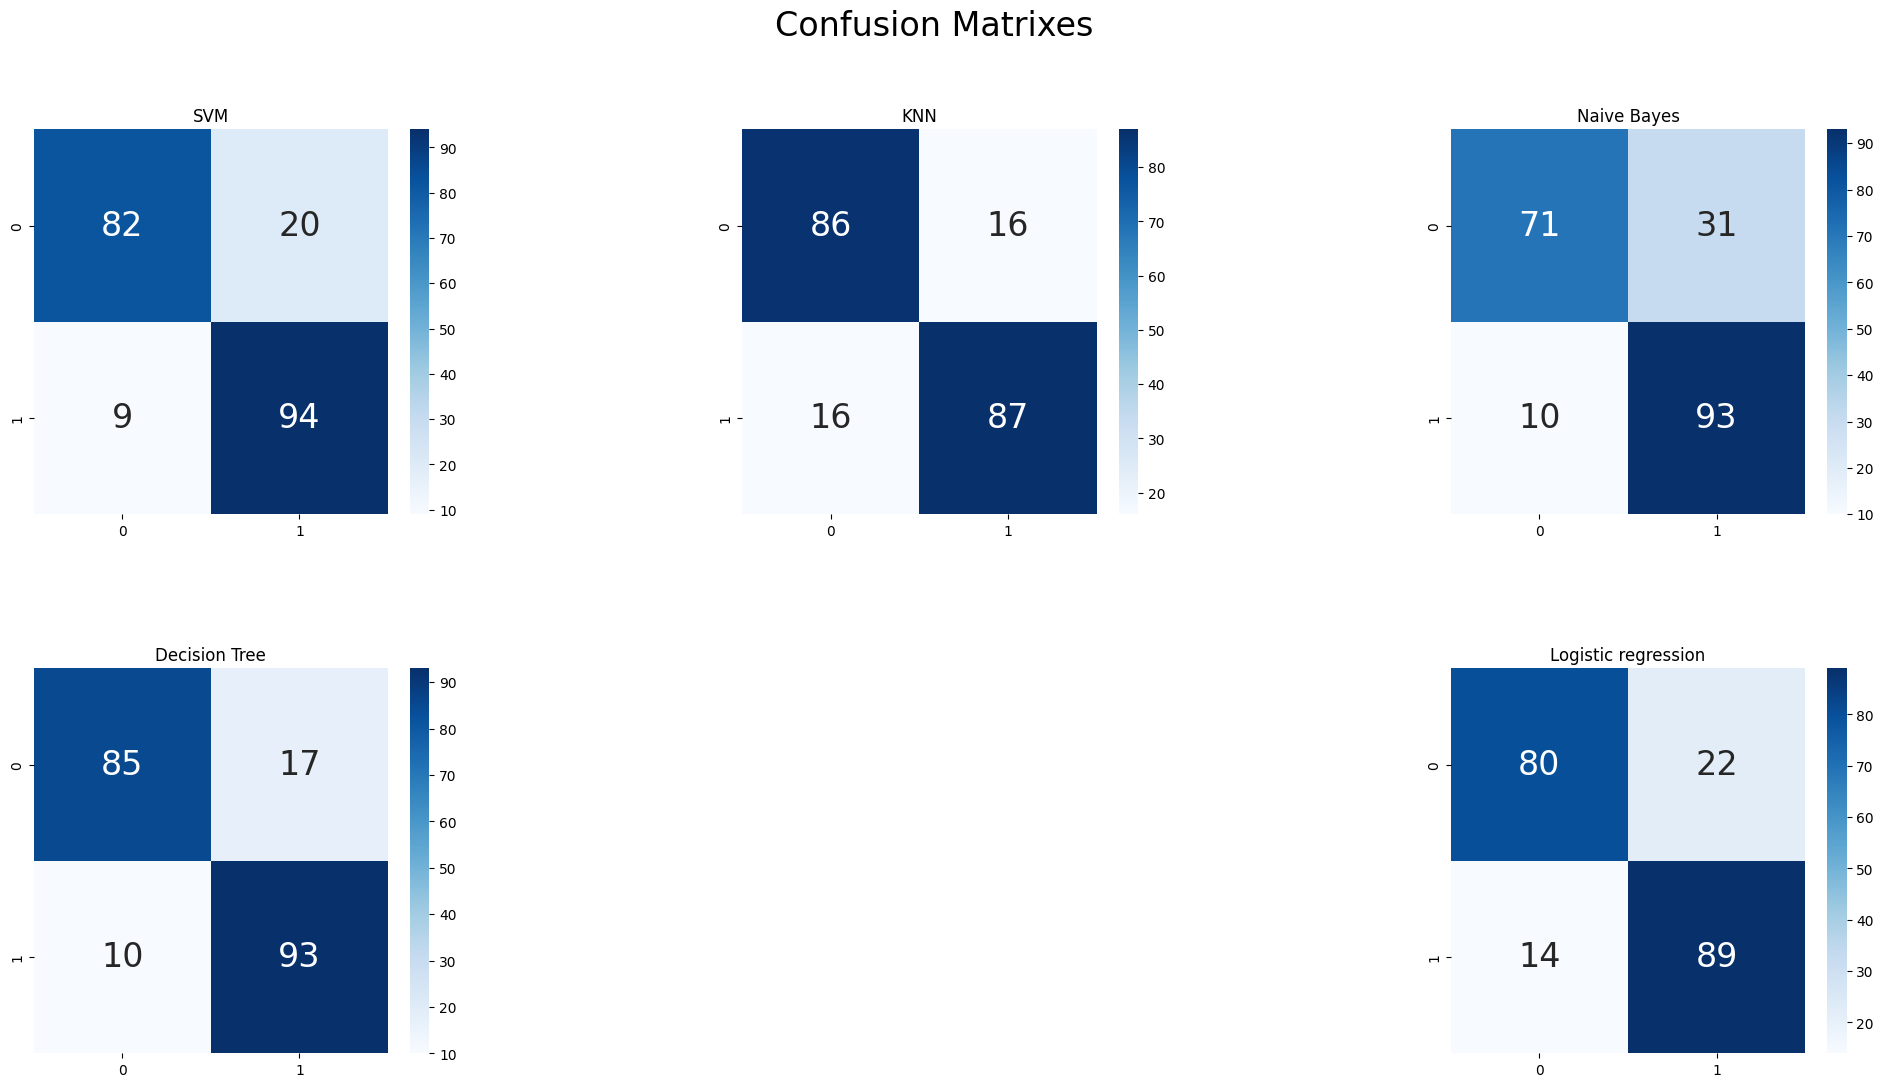

In [324]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.6, hspace= 0.4)

plt.subplot(2, 3, 1)
plt.title("SVM")
sns.heatmap(confusion_matrix(y_test, y_pred_svm), cmap="Blues", annot=True, fmt="d", annot_kws={"size": 24})

plt.subplot(2, 3, 2)
plt.title("KNN")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.subplot(2, 3, 3)
plt.title("Naive Bayes")
sns.heatmap(confusion_matrix(y_test, y_pred_bayes), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.subplot(2, 3, 4)
plt.title("Decision Tree")
sns.heatmap(confusion_matrix(y_test,  y_pred_tree), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})


plt.subplot(2, 3, 6)
plt.title("Logistic regression")
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True, fmt='d', annot_kws={"size": 24})

plt.show()

Дополнительное задание 2 (+2 балла). Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [220]:
import pandas as pd
new_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
new_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [221]:
new_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [222]:
new_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [223]:
new_data.groupby('gender')['bmi'].mean() 

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

In [224]:
new_data.loc[(new_data['bmi'].isnull()) & (new_data['gender'] == 'Female'), 'bmi'] = 29
new_data.loc[(new_data['bmi'].isnull()) & (new_data['gender'] == 'Male'), 'bmi'] = 28.64
new_data.loc[(new_data['bmi'].isnull()) & (new_data['gender'] == 'Other'), 'bmi'] = 22.4
new_data['bmi'].isnull().any()  # избавились от пропусков в данных

False

In [225]:
new_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [226]:
new_data['bmi'].value_counts()

29.00    123
28.64    104
28.70     41
28.40     38
26.70     37
        ... 
11.50      1
40.60      1
53.90      1
97.60      1
14.90      1
Name: bmi, Length: 419, dtype: int64

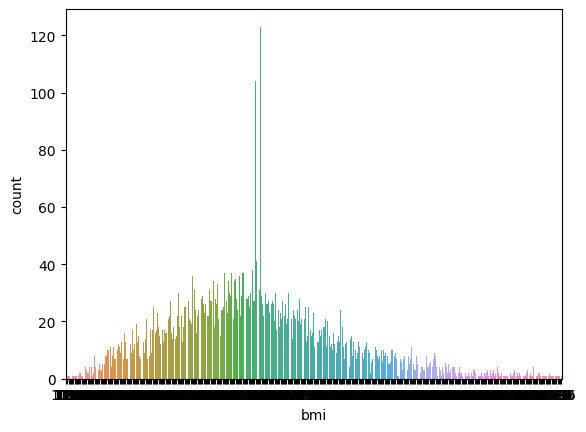

In [227]:
sns.countplot(x='bmi', data=new_data);

In [228]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Переведем признаки в числовые значения

In [229]:
new_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [230]:
new_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [231]:
new_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [232]:
new_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [233]:
new_data['smoking_status'].unique()


array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [234]:
new_data['gender'] = new_data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
new_data['ever_married'] = new_data['ever_married'].map({'Yes': 0, 'No': 1})
new_data['work_type'] = new_data['work_type'].map({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
new_data['Residence_type'] = new_data['Residence_type'].map({'Urban': 0, 'Rural': 1})
new_data['smoking_status'] = new_data['smoking_status'].map({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3 })

In [235]:
new_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,51676,1,61.0,0,0,0,1,1,202.21,29.0,1,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1


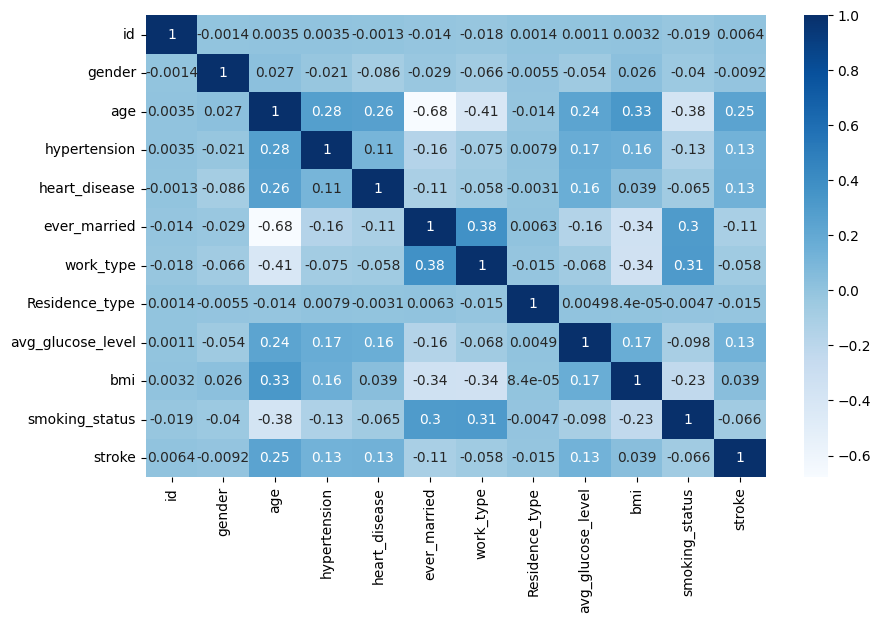

In [236]:
plt.figure(figsize=(10, 6))
sns.heatmap(new_data.corr(), annot=True, cmap='Blues')
plt.show()

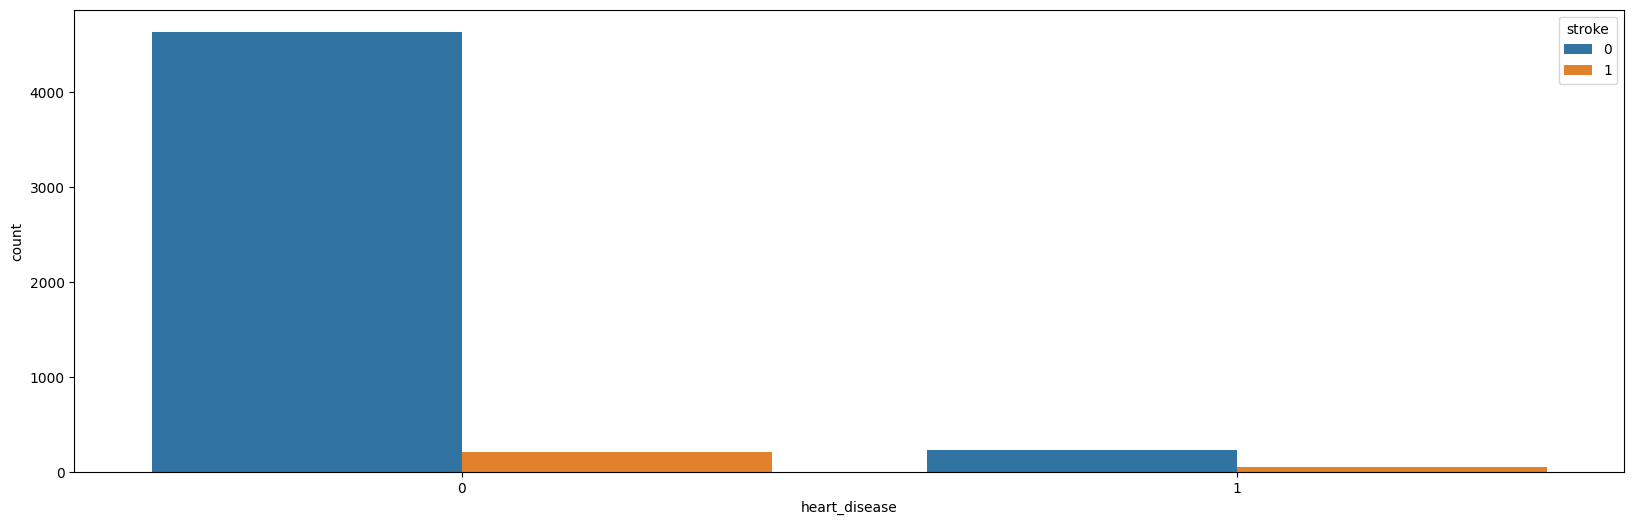

In [237]:
plt.figure(figsize=(20, 6))
sns.countplot(x='heart_disease', hue='stroke', data=new_data)
plt.show()



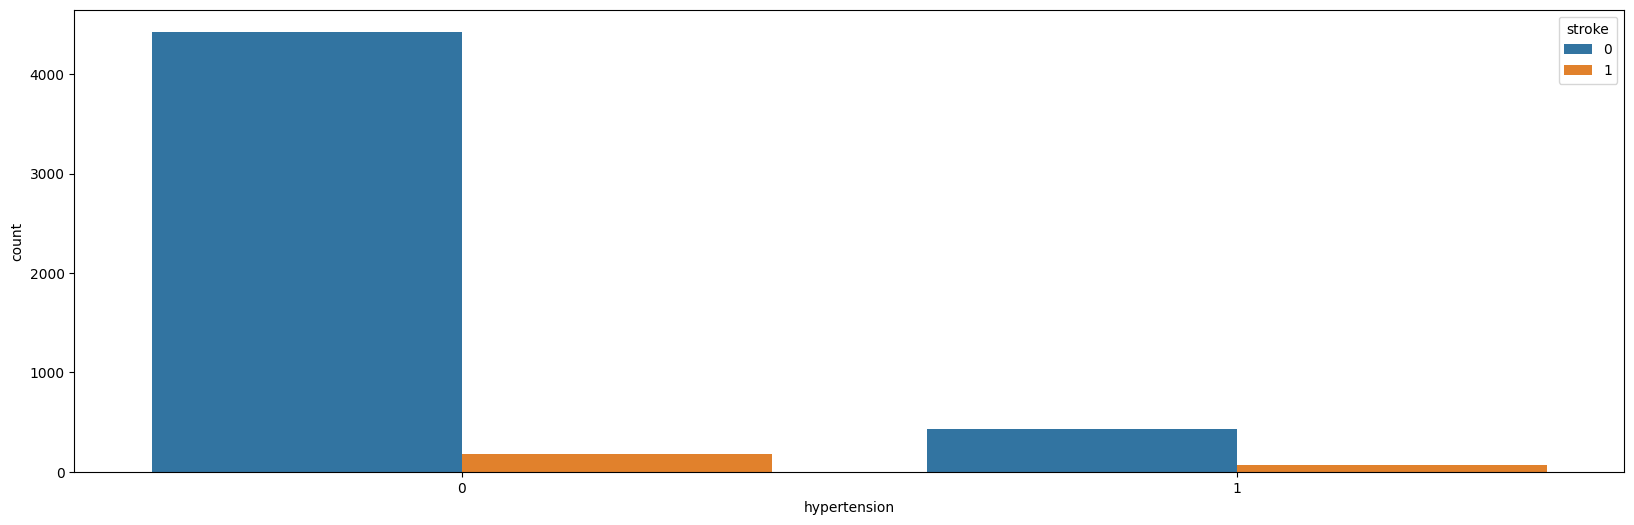

In [238]:
plt.figure(figsize=(20, 6))
sns.countplot(x='hypertension', hue='stroke', data=new_data)
plt.show()

In [239]:
new_data = new_data.reset_index()
X_train = new_data.drop(['stroke'], axis=1)
y_train = new_data['stroke']



RFE

In [241]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logRed = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(logRed, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)


print('Selected features: %s' % list(X_train.columns[rfe.support_]))

X_train = X_train.drop(['index', 'gender', 'work_type', 'bmi', 'smoking_status'], axis=1)


Selected features: ['index', 'gender', 'work_type', 'Residence_type', 'bmi', 'smoking_status']


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [244]:

model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)
y_lg = model_LR.predict(X_test_scaled)
new_data_lg = accuracy_score(y_test, y_lg)
print(f'accuracy: {new_data_lg}')

accuracy: 0.9393346379647749


SVM

In [247]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
grid = {'C': np.logspace(-3, 3, 7)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svm = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
svm = svm.fit(X_train_scaled, y_train)
print(f'Best Score: {svm.best_score_} using {svm.best_params_}')

Best Score: 0.9542571551848125 using {'C': 0.001}


KNN

In [249]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_knn = model_knn.predict(X_test_scaled)
new_data_knn = accuracy_score(y_test, y_knn)
print(f'accuracy: {new_data_knn}')

accuracy: 0.9334637964774951


In [250]:
model_knn = KNeighborsClassifier()
grid = {'n_neighbors': np.arange(1, 20)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_} using {grid_result.best_params_}')

Best Score: 0.9542571551848125 using {'n_neighbors': 10}


Decision Tree

In [251]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_scaled, y_train)
y_dt = model_DT.predict(X_test_scaled)
new_data_dt = accuracy_score(y_test, y_dt)
print(f'accuracy: {new_data_dt}')

accuracy: 0.9187866927592955


In [252]:
model_DT = DecisionTreeClassifier()
grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 20)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_DT, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_} using {grid_result.best_params_}')

Best Score: 0.9542571551848125 using {'criterion': 'gini', 'max_depth': 1}


Naive Bayes

In [253]:
model_NB = GaussianNB()
model_NB.fit(X_train_scaled, y_train)
y_nb = model.predict(X_test_scaled)
new_data_nb = accuracy_score(y_test, y_nb)
print(f'accuracy: {new_data_nb}')

accuracy: 0.9334637964774951


In [254]:
model_NB = GaussianNB()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_NB, param_grid={}, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print(f'Best Score: {grid_result.best_score_}')

Best Score: 0.8710079182447223


In [ ]:
num_iters = [100, 1000, 10000]
lr = [0.001, 0.01, 0.1]
param_grid = {'num_iters': num_iters, 'lr': lr, 'verbose': [False]}
grid = GridSearchCV(MySVM(), param_grid, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)